In [27]:
import gym
from gym import spaces
#from gym.utils import seeding
import numpy as np
import tensorflow as tf
from scipy.spatial.transform import Rotation as R
from scipy import optimize
import scipy.optimize as opt
from tensorflow_graphics.geometry import transformation

In [1]:
import tensorflow as tf
from tensorboardX.writer import SummaryWriter

ModuleNotFoundError: No module named 'tensorboardX'

In [1]:
from packing.wrappers.saute_env import saute_env
from packing.wrappers.safe_env import  SafeEnv

In [59]:
action = np.array([2,1,1,0,1,1,1,1], dtype=np.float32)
action = action.reshape(-1, 4)

# set action for cell

#qua = transformation.quaternion.normalize(action[0])
action[0:2 , -1]

array([0., 1.], dtype=float32)

In [3]:
i=0
j=0
i=j=1
j

1

In [157]:
def func (x, d):
    return x+d

#bnds = (0, 1)
x0 = 0
res=opt.minimize(func,x0,[1.0])
res.fun
#def g(u):
#    return opt.minimize(fun, 0, args=[1], method='SLSQP')
# #optimize.fminbound(lambda y: f(u,y), 0, 1.5)



#x_c = optimize.fminbound(lambda x: -g(x), 0., 1.)
#x_c

s:\Anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\optimize.py:1277: RuntimeWarning: overflow encountered in multiply
  sk[np.newaxis, :])
s:\Anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\linesearch.py:287: RuntimeWarning: invalid value encountered in multiply
  return f(xk + alpha * pk, *args)


array([-3.39211811e+155])

In [73]:
lambda x: (optimize.fminbound(lambda y: f(x,y), 0, 1))g = optimize.fminbound(, 0,1)
g

0.9999940391390134

In [230]:
from scipy.optimize import minimize
import math
def func(x,a):
    return a/x+x
x0=2.0
#res=minimize(func,x0,[4.0])
def cell(a):
    return minimize(func, x0,[a]).fun

x1=2.0
#g(1)
res = minimize(cell, x1)



#print("func最小值:",res.fun)
#print("对应x的取值:",res.x)



ValueError: `f0` passed has more than 1 dimension.

In [45]:
tran_low = np.array([-1., 0., 0.])
tran_high = np.array([1,1,1])
a=np.random.uniform(low=tran_low, high=tran_high, size=(3,))
b=np.random.uniform(low=-1., high=1., size=(3,3))
b

array([[-0.85015007, -0.44129519, -0.60040892],
       [ 0.48136899, -0.15084651, -0.02182615],
       [-0.74016325,  0.15742505, -0.38878139]])

In [21]:
import numpy as np

def affine_coordinate(vec, lattice):
    """
    coordinate transformation
    """
    lat = np.linalg.pinv(lattice)
    new_vec = np.matmul(lat, vec.reshape(-1,1))
    return new_vec.reshape(1,-1)[0]


# particle semi-length
semi_length = np.array([1, 0, 0])

# particle pos and orientation
# better with reference frame
particle_info = []
for i in range(2):
        particle_info.append(np.concatenate([np.array([1.5,1,1])] + [np.array([1,1,1,1])]))

cell_info = np.multiply(semi_length, np.diag([1,1,1]))
# cell basis (with norm)
#cell_info = np.multiply(semi_length, np.diag([1,1,1])).tolist()
#b=np.concatenate([semi_length] + particle_info+cell_info)

a = np.array([[-0.85015007, 0, 0],
       [ 0.48136899, -0.15084651, 0],
       [-0.74016325,  0.15742505, -0.38878139]])

base = np.append(a, a[0]+a[1])

#base = np.append(base, base[0]+base[2])
#base = np.append(base, base[1]+base[2])
#base = np.append(base, base[0]+base[1]+base[2])


local_c = affine_coordinate(semi_length, cell_info)
#local_c
#semi_length
(a).tolist()
np.asarray([1])

new_centroid = np.matmul(a.T, semi_length.T)
new_centroid

# new_centroid = np.matmul(semi_length, a)
# new_centroid

array([-0.85015007,  0.        ,  0.        ])

In [2]:
range = (1, 2)

range = [range]

range[0]

(1, 2)

In [2]:
a=0
a=a=1
a
import numpy as np

ROWS = np.arange(0, 8)
ROWS+1.

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [59]:
tran_low = np.array([-1., 0., 0.])
tran_high = np.array([1,1,1])
a=np.random.uniform(low=tran_low, high=tran_high, size=(3,))
b=np.random.uniform(low=-1., high=1., size=(3,3))

for i in range(3):
    b[i] /= np.linalg.norm(b[i])


qua = np.array([0, 0, 0, 1], dtype=np.float32)
rot = transformation.quaternion.normalize(qua)
b = tf.convert_to_tensor(b[0], dtype=float)
b = transformation.quaternion.rotate(b, rot)
b


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.4581671 ,  0.55302423, -0.6958787 ], dtype=float32)>

In [19]:
def Fun_AB(t, XA, XB, r):
        # F_AB = t(1-t)r^T Y^{-1} r
        Y = t*np.linalg.pinv(XB) + (1.-t)*np.linalg.pinv(XA)
        Y = np.linalg.pinv(Y)

        F_AB = np.matmul(r.reshape(1,-1), Y)
        F_AB = t*(1.-t)*np.matmul(F_AB, r.reshape(-1,1)) - 1.
        
        assert len(F_AB) == 1
        return F_AB[0][0]

In [33]:
O = np.diag([1./4.,1./2.,1])
r = np.array([1,0,0])
t_c = optimize.fminbound(lambda t: -Fun_AB(t, O, O, r), 0, 1)
overlap_p = Fun_AB(t_c, O, O, r)
overlap_p

0.0625

In [38]:
a = transformation.quaternion.normalized_random_uniform([1])
a

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.24874476, -0.4877902 ,  0.5289457 ,  0.64838505]],
      dtype=float32)>

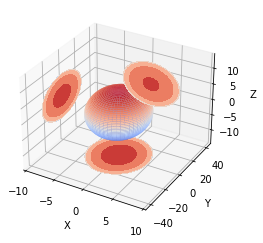

In [1]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

from matplotlib import cm

import numpy as np

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Make data

a,b,c= 5.0,25.0,7.0

u = np.linspace(0, 2 * np.pi, 100)

v = np.linspace(0, np.pi, 100)

x = a * np.outer(np.cos(u), np.sin(v))

y = b * np.outer(np.sin(u), np.sin(v))

z = c * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface

ax.plot_surface(x, y, z, color='b',cmap=cm.coolwarm)

cset = ax.contourf(x, y, z, zdir='x', offset=-2*a, cmap=cm.coolwarm)

cset = ax.contourf(x, y, z, zdir='y', offset=1.8*b, cmap=cm.coolwarm)

cset = ax.contourf(x, y, z, zdir='z', offset=-2*c, cmap=cm.coolwarm)

ax.set_xlabel('X')

ax.set_xlim(-2*a, 2*a)

ax.set_ylabel('Y')

ax.set_ylim(-1.8*b, 1.8*b)

ax.set_zlabel('Z')

ax.set_zlim(-2*c, 2*c)

plt.show()


s:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


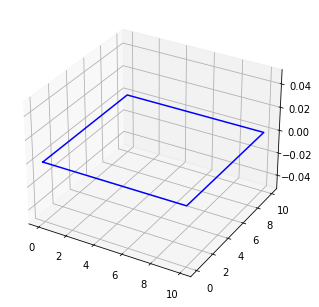

In [2]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

from matplotlib import cm

import numpy as np



def plot_plate(ax, color='blue',size = [10,10,10]):
    xd = [0, 0, size[0], size[0], 0]
    yd = [0, size[0], size[0], 0, 0]
    zd = [0, 0, 0, 0, 0]
    kwargs = {'alpha': 1, 'color': color}
    ax.plot3D(xd, yd, zd, **kwargs)

fig = plt.figure()
ax = Axes3D(fig)
plot_plate(ax)
plt.show()





In [1]:
from functional import seq
a=[1,2,3]
a[:-1]
seq(a[:-1]).zip(a[1:])
#.map(lambda x: Linear(x[0], x[1])

ImportError: cannot import name 'seq' from 'functional' (s:\Anaconda3\envs\tensorflow\lib\site-packages\functional\__init__.py)